# Calculate Growth and Mortality


## Setup


In [26]:
import sys

sys.path.insert(0, "../../src")
from imports import *

init_notebook()

# Load NFI data
nfi_raw = get_final_nfi_data_for_analysis()
nfi_raw.shape
nfi_raw["species_lat"] = nfi_raw["species_lat2"]

from IPython.display import clear_output

# Set figure font
plt.rcParams["font.family"] = "Arial"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

Loading final NFI data for analysis... (output of python wrangling)
- Latest file is /Users/pascal/my_work/projects active/ifn_analysis/data/final/nfi/nfi_ready_for_analysis.feather 
- Created on Monday 2024-11-25, 18:25 which is 94 days ago.
  Number of trees:  687268
  Number of sites:  50012


In [27]:
# Get all analyzed species
species_in_final_anlysis = get_species_with_models("list")

# Get species occurerence data for species in final analysis
top_species_all = nfi_raw.query("tree_state_change in ['alive_alive', 'alive_dead']")

# Get normalized and non normalized counts
top_species_all["species"] = top_species_all["species_lat2"]
tmp_abs = top_species_all[["species", "genus_lat"]].value_counts()
tmp_norm = top_species_all[["species", "genus_lat"]].value_counts(normalize=True)

# Concat data
top_species_all = pd.concat(
    [tmp_abs, tmp_norm], axis=1, keys=["count", "percent"]
).reset_index()


# Reduce to 52 and redo the relative count
top52_species = top_species_all.head(52).copy()
top52_species["percent"] = top52_species["count"] / top52_species["count"].sum()

top52_species["percent"] = top52_species["percent"] * 100
top52_species["percent"] = top52_species["percent"].round(1)

# Attach species title with percentage
top52_species["title"] = (
    top52_species["species"].astype(str)
    + " ("
    + top52_species["percent"].astype(str)
    + "%)"
)

# Reduce to top 9
top9_species = top52_species.head(9).copy()
top9 = top9_species.copy()

# Show
display(top9)
display(top52_species)

/var/folders/39/534x_msj7sl1kcxj2mg109x40000gn/T/ipykernel_1089/2813264437.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_species_all["species"] = top_species_all["species_lat2"]


,species,genus_lat,count,percent,title
0,Fagus sylvatica,Fagus,52379,9.2,Fagus sylvatica (9.2%)
1,Quercus robur,Quercus,51299,9.0,Quercus robur (9.0%)
2,Quercus petraea,Quercus,50662,8.9,Quercus petraea (8.9%)
3,Carpinus betulus,Carpinus,48409,8.5,Carpinus betulus (8.5%)
4,Castanea sativa,Castanea,36756,6.4,Castanea sativa (6.4%)
5,Quercus pubescens,Quercus,35602,6.2,Quercus pubescens (6.2%)
6,Pinus sylvestris,Pinus,29755,5.2,Pinus sylvestris (5.2%)
7,Abies alba,Abies,29015,5.1,Abies alba (5.1%)
8,Picea abies,Picea,27050,4.7,Picea abies (4.7%)


,species,genus_lat,count,percent,title
0,Fagus sylvatica,Fagus,52379,9.2,Fagus sylvatica (9.2%)
1,Quercus robur,Quercus,51299,9.0,Quercus robur (9.0%)
2,Quercus petraea,Quercus,50662,8.9,Quercus petraea (8.9%)
3,Carpinus betulus,Carpinus,48409,8.5,Carpinus betulus (8.5%)
4,Castanea sativa,Castanea,36756,6.4,Castanea sativa (6.4%)
5,Quercus pubescens,Quercus,35602,6.2,Quercus pubescens (6.2%)
6,Pinus sylvestris,Pinus,29755,5.2,Pinus sylvestris (5.2%)
7,Abies alba,Abies,29015,5.1,Abies alba (5.1%)
8,Picea abies,Picea,27050,4.7,Picea abies (4.7%)
9,Fraxinus excelsior,Fraxinus,23312,4.1,Fraxinus excelsior (4.1%)


## Settings


In [28]:
# Settings
kwargs = {
    # ! General
    "file_suffix": None,
    # ! Metric
    "my_metric": "mort_nat_stems_prc_yr",  # "mort_nat_stems_prc_yr" mort_nat_vol_yr, mort_nat_vol_prc_yr
    # ! Data Wrangling
    "df": nfi_raw.copy(),
    # "my_grouping": ["gre", "species_lat"],
    "my_grouping": ["gre"],
    "my_method": "direct_bs",
    "load_from_file": True,
    "top_n_groups": None,
    "n_bootstraps_samples": 100,
    # ! Data Filter
    "min_trees_per_site": 0,
    "min_sites_per_group_year": 0,
    "reduce_to_dominant_sites": False,
    "weigh_by_sites_or_trees": "none",  # none, sites, trees
    # ! Plotting
    "plot_type": "facet",  # all or facet
    "save_plot": True,
    "center_to_first_year": False,
    "normalize_to_first_year": False,
    "ylim": None,  # [-200, 400],  # None or [min, max]
    "facet_label_trees_or_sites": "trees",  # trees or sites
    "uncertainty_representation": "band",  # band, bar, none
    "uncertainty_variable": "std",
    "aggregation_variable": "mean",
    "top_n_metric": "most_observations",  # most_observations or highest_final_mortality
    "top_n_groups_plot": 15,
    # "genus_filter": None,  # None or list of genus_lat values to filter for # ! Not implemented yet, needs a species-genus dictionary!
}


def custom_sort_key(element):
    priority_order = ["gre", "ser", "hex", "reg", "dep"]
    if element in priority_order:
        return (priority_order.index(element), element)
    else:
        return (len(priority_order), element)

In [46]:
iregion = "gre"
# | gre, ser, hex, reg, dep | Region to plot
what_species = "top9"
# | top9, all, final_analysis | Relevant whether map trend is based on all or top9 species
by_species_or_direct = "by_species"
# | by_species or directly | Relevant whether map trend is weighted by species or calculated directly
# fig1_folder = "./specific_runs/fig_1/data"
fig1_folder = "../../data/final/mortality_trends"
# | Folder to save the data for the figure
os.makedirs(fig1_folder, exist_ok=True)

## Data for temporal trends


In [47]:
file_temp = f"{fig1_folder}/df_top9_temporal_data.feather"

if os.path.exists(file_temp):
    df_top9 = pd.read_feather(file_temp)
    print(f"Loaded data from file: {file_temp}")
    chime.info()
else:
    # Only need the top9 species for the facet grid
    kwargs["suffix"] = (
        f"temporal_trend-region_{iregion}-species_{what_species}-calculation_{by_species_or_direct}"
    )
    kwargs["df"] = nfi_raw.copy().query("species_lat in @top9_species['species']")
    kwargs["my_grouping"] = ["species_lat"]
    kwargs["load_from_file"] = False

    print(kwargs["suffix"])

    # Run function
    kwargs["my_grouping"] = sorted(kwargs["my_grouping"], key=custom_sort_key)
    df_counts, df_gm, df_grouped = start_to_finish_temporal_plot(
        kwargs,
        return_before_plotting=True,
    )
    chime.success()

    df_top9_raw = df_grouped.copy()

    # ! Wrangling
    # Get copy of df_grouped
    df_top9 = df_top9_raw.copy()

    # Extract group and year
    df_top9["group"] = df_top9["group_year"].str.split("_", expand=True)[0]
    df_top9["year"] = df_top9["group_year"].str.split("_", expand=True)[1].astype(int)

    # Extract mean value
    df_top9["mean"] = df_top9[f"{kwargs['my_metric']}_mean"]
    df_top9["std"] = df_top9[f"{kwargs['my_metric']}_std"]

    # Reduce df size
    df_top9 = df_top9[["group", "year", "group_year", "mean", "std"]].copy()
    df_top9["region"] = df_top9["group"].str.split("&", expand=True)[0]

    # Save it
    df_top9.to_feather(f"{fig1_folder}/df_top9_temporal_data.feather")

df_top9.head()

Loaded data from file: ../../data/final/mortality_trends/df_top9_temporal_data.feather


,group,year,group_year,mean,std,region
0,Abies alba,2010,Abies alba_2010,0.378181,0.043511,Abies alba
1,Abies alba,2011,Abies alba_2011,0.308842,0.044150,Abies alba
2,Abies alba,2012,Abies alba_2012,0.322340,0.036814,Abies alba
3,Abies alba,2013,Abies alba_2013,0.445391,0.044217,Abies alba
4,Abies alba,2014,Abies alba_2014,0.529419,0.059037,Abies alba


## Data for spatial trends


In [48]:
if what_species == "all":
    kwargs["df"] = nfi_raw.copy()
elif what_species == "top9":
    kwargs["df"] = nfi_raw.copy().query("species_lat in @top9_species['species']")
elif what_species == "final_analysis":
    kwargs["df"] = nfi_raw.copy().query("species_lat in @species_in_final_anlysis")
else:
    chime.error()
    raise ValueError("what_species must be 'all' or 'top9'")

if by_species_or_direct == "by_species":
    kwargs["my_grouping"] = [iregion, "species_lat"]
elif by_species_or_direct == "directly":
    kwargs["my_grouping"] = [iregion]
else:
    chime.error()
    raise ValueError("by_species_or_direct must be 'by_species' or 'directly'")

kwargs["suffix"] = (
    f"map_trend-region_{iregion}-species_{what_species}-calculation_{by_species_or_direct}"
)
kwargs["load_from_file"] = True
# filename_df_map = f"{fig1_folder}/df_map_trend-region_{iregion}-species_{what_species}-calculation_{by_species_or_direct}.feather"
filename_df_map = f"../../data/final/mortality_trends/df_map_trend-region_gre-species_{what_species}-calculation_by_species.feather"
print(filename_df_map)

../../data/final/mortality_trends/df_map_trend-region_gre-species_top9-calculation_by_species.feather


In [49]:
if os.path.exists(filename_df_map):
    # Load and show the data
    print(f"Loading: {filename_df_map}")
    df_map = (
        pd.read_feather(filename_df_map)
        .drop(columns=["gre_num", "gre_name", "geometry"])
        .rename(columns={kwargs["my_grouping"][0]: "region"})
    )

    # ! Turn into gdf
    # Attach geometry
    shp_region = get_shp_of_region(
        kwargs["my_grouping"][0], make_per_year=None, make_per_group=None
    ).rename(columns={kwargs["my_grouping"][0]: "region"})
    df_map = shp_region.merge(df_map, on="region")

    chime.info()

else:
    # ! Run function -----------------------------------
    kwargs["my_grouping"] = sorted(kwargs["my_grouping"], key=custom_sort_key)
    df_counts, df_gm, df_grouped = start_to_finish_temporal_plot(
        kwargs,
        return_before_plotting=True,
    )
    chime.success()

    # Save raw data
    df_map_raw = df_grouped.copy()
    df_map_raw.to_feather(filename_df_map.replace("df_map_trend", "df_map_trend_raw"))

    # ! Wrangling -----------------------------------
    from sklearn.linear_model import LinearRegression

    if by_species_or_direct == "directly":
        # Get copy of df_grouped
        df_map = df_map_raw.copy()

        # Extract group and year
        df_map["group"] = df_map["group_year"].str.split("_", expand=True)[0]
        df_map["year"] = df_map["group_year"].str.split("_", expand=True)[1].astype(int)

        # Extract mean value
        df_map["mean"] = df_map[f"{kwargs['my_metric']}_mean"]
        df_map["std"] = df_map[f"{kwargs['my_metric']}_std"]

        # Reduce df size
        df_map = df_map[["group", "year", "group_year", "mean", "std"]].copy()
        df_map["region"] = df_map["group"].str.split("&", expand=True)[0]

        # For each group, calculate the slope of the regression of the mean value over year
        slopes = df_map.groupby("group").apply(
            lambda x: np.polyfit(x["year"], x["mean"], 1)[0], include_groups=False
        )

        slopes = slopes.reset_index().rename({0: "slope"}, axis=1)

        # Load the shapefile for the regions
        shp = get_shp_of_region(
            kwargs["my_grouping"][0], make_per_year=None, make_per_group=None
        )

        # Merge the slopes with the shapefile
        shp = shp.merge(slopes, left_on=kwargs["my_grouping"][0], right_on="group")

    elif by_species_or_direct == "by_species":

        # Get copy of df_grouped
        df_map = df_map_raw.copy()

        # Extract group and year
        df_map["group"] = df_map["group_year"].str.split("_", expand=True)[0]
        df_map["year"] = df_map["group_year"].str.split("_", expand=True)[1].astype(int)

        # Extract mean value
        df_map["mean"] = df_map[f"{kwargs['my_metric']}_mean"]
        df_map["std"] = df_map[f"{kwargs['my_metric']}_std"]

        # Reduce df size
        df_map = df_map[["group", "year", "group_year", "mean", "std"]].copy()
        df_map["region"] = df_map["group"].str.split("&", expand=True)[0]

        # Loop over each group and regress mean mortality against year
        grouped = df_map.groupby("group")
        results = []

        for name, group in grouped:
            # Get group data
            X = group["year"].values
            y = group["mean"].values

            # Fit linear model
            model = LinearRegression().fit(X.reshape(-1, 1), y)

            # Get slope and intercept
            slope = model.coef_[0]
            intercept = model.intercept_

            # Get p-value
            p_value = stats.linregress(X, y).pvalue

            # Append to results
            results.append(
                {
                    "group": name,
                    "slope": slope,
                    "intercept": intercept,
                    "p_value": p_value,
                }
            )
        results = pd.DataFrame(results)

        # ! Get weights (= percentage of trees belonging to a species in a region)
        # Load data
        dfw = nfi_raw.copy()
        # Attach group-region column
        dfw["group"] = (
            dfw[kwargs["my_grouping"][0]].astype(str)
            + "&"
            + dfw["species_lat"].astype(str)
        )
        # Calculate number of trees per group and region
        dfw = (
            dfw.query("tree_state_change in ['alive_alive', 'alive_dead']")
            .groupby("group", observed=True)
            .agg(weights=("tree_id", "count"))
            .reset_index()
        )

        # Attach region
        dfw["region"] = dfw["group"].str.split("&", expand=True)[0]
        # Normalize per region
        dfw["weights"] = dfw["weights"] / dfw.groupby("region")["weights"].transform(
            "sum"
        )

        # ! Merge with results
        results = results.merge(dfw, on="group")

        # Extract region
        results["region"] = results["group"].str.split("&", expand=True)[0]
        results
        # Calculate the mean slope, weighted by number of trees
        results["weighted_slope"] = results["slope"] * results["weights"]

        # Remove insignificant results
        # results = results.query("p_value < 0.05")

        # Get the mean slope per region
        results = results.groupby("region").agg(
            # slope=("slope", "mean"),
            slope=("weighted_slope", "sum"),
            # n_trees=("n_trees", "sum"),
        )

        # ! Turn into gdf
        # Get region shapefile
        shp_region = get_shp_of_region(
            kwargs["my_grouping"][0], make_per_year=None, make_per_group=None
        ).rename(columns={kwargs["my_grouping"][0]: "region"})

        # Merge with results
        shp = shp_region.merge(results, on="region")
    else:
        chime.error()
        raise ValueError("by_species_or_direct must be 'by_species' or 'directly'")

    shp.to_feather(filename_df_map)
    df_map = shp.copy()

df_map

Loading: ../../data/final/mortality_trends/df_map_trend-region_gre-species_top9-calculation_by_species.feather


,region,gre_num,gre_name,geometry,slope
0,A,1.0,Grand Ouest cristallin et océanique,"MULTIPOLYGON (((116917.964 6799158.328, 116897...",-0.002775
1,B,2.0,Centre Nord semi-océanique,"MULTIPOLYGON (((575824.671 6597609.104, 575780...",0.054453
2,C,3.0,Grand Est semi-continental,"POLYGON ((837908.830 6525690.064, 837897.182 6...",0.072369
3,D,4.0,Vosges,"MULTIPOLYGON (((997406.727 6744759.537, 997408...",0.077383
4,E,5.0,Jura,"MULTIPOLYGON (((914622.725 6497468.467, 914713...",0.091310
5,F,6.0,Sud-Ouest océanique,"MULTIPOLYGON (((425801.090 6249671.342, 425783...",0.030274
6,G,7.0,Massif central,"MULTIPOLYGON (((751348.008 6313240.901, 751349...",0.038307
7,H,8.0,Alpes,"MULTIPOLYGON (((1040928.420 6347992.450, 10410...",0.039353
8,I,9.0,Pyrénées,"MULTIPOLYGON (((703330.712 6152648.634, 703169...",0.010081
9,J,10.0,Méditerranée,"MULTIPOLYGON (((703513.204 6192911.663, 703512...",0.018740


## Plotting functions


In [50]:
from matplotlib.ticker import FormatStrFormatter


def plot_species_trend(species, df, ax=None, font_scaler=1):
    # Get species data
    df_species = df.query("group == @species").sort_values("year")

    # Plot
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 6))

    # Plot
    df_species["year"] = df_species["year"] + 5  # ! Bugfix for the year
    ax.plot(df_species["year"], df_species["mean"], color="black")
    ax.fill_between(
        df_species["year"],
        df_species["mean"] - df_species["std"],
        df_species["mean"] + df_species["std"],
        alpha=0.3,
        color="black",
        edgecolor=None,
    )

    # Labels
    # ax.set_title(f"{species}")
    ax.set_xlabel("Year", fontsize=12 * font_scaler)
    ax.set_ylabel("Mortality Rate (%-stems yr$^{-1}$)", fontsize=12 * font_scaler)

    # Reduce y-ticks
    ax.yaxis.set_major_locator(plt.MaxNLocator(3))

    # Reduce x-ticks
    if df.year.nunique() == 9:
        # Includes 2023 census
        nxticks = 5
    else:
        nxticks = 4

    # Format ticks
    ax.xaxis.set_major_locator(plt.MaxNLocator(nxticks))
    ax.yaxis.set_major_formatter(FormatStrFormatter("%.1f"))

    # Set font size for ticks
    ax.tick_params(axis="both", which="major", labelsize=12 * font_scaler)

    # Remove upper and right spines
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

    return ax


# plot_species_trend("Abies alba", df_top9, font_scaler=1)
# plt.show()

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import box, Polygon


def get_species_dist(
    species,
    nfi_data,
    jitter_amount=1000,
    dot_size=5,
    ax=None,
    bold_names=False,
    font_scaler=1,
    with_title=True,
):

    # Get data for Quercus robur
    qr_alive = nfi_data.copy().query(
        "species_lat2 == @species and tree_state_change == 'alive_alive'"
    )

    qr_dead = nfi_data.copy().query(
        "species_lat2 == @species and tree_state_change == 'alive_dead'"
    )

    # Make map of France and plot alive as green and dead as red
    shp_france = get_shp_of_region("cty", make_per_year=None, make_per_group=None)

    # Add minor jitter to the coordinates to avoid overplotting
    qr_alive["lat_fr"] = qr_alive["lat_fr"] + np.random.uniform(
        -jitter_amount, jitter_amount, len(qr_alive)
    )
    qr_alive["lon_fr"] = qr_alive["lon_fr"] + np.random.uniform(
        -jitter_amount, jitter_amount, len(qr_alive)
    )

    qr_dead["lat_fr"] = qr_dead["lat_fr"] + np.random.uniform(
        -jitter_amount, jitter_amount, len(qr_dead)
    )
    qr_dead["lon_fr"] = qr_dead["lon_fr"] + np.random.uniform(
        -jitter_amount, jitter_amount, len(qr_dead)
    )

    # Turn df into geodataframe
    qr_alive = gpd.GeoDataFrame(
        qr_alive, geometry=gpd.points_from_xy(qr_alive.lon_fr, qr_alive.lat_fr)
    )

    qr_dead = gpd.GeoDataFrame(
        qr_dead, geometry=gpd.points_from_xy(qr_dead.lon_fr, qr_dead.lat_fr)
    )

    # If ax is None, create a new figure and axis
    if ax is None:
        fig, ax = plt.subplots(figsize=(4, 4))
        show_plot = True
    else:
        show_plot = False

    # Plot the France boundary
    shp_france.boundary.plot(ax=ax, color="black", linewidth=0.5)

    # Create a "mask" that covers everything outside France to avoid plotting there
    xmin, ymin, xmax, ymax = shp_france.total_bounds
    bounding_box = box(xmin - 2, ymin - 2, xmax + 2, ymax + 2)

    mask = gpd.GeoDataFrame(
        geometry=[bounding_box.difference(shp_france.unary_union)], crs=shp_france.crs
    )

    # Plot the mask on top of everything, with white color
    mask.plot(ax=ax, color="white", edgecolor="none")

    # Plot alive trees
    qr_alive.plot(
        ax=ax,
        color="lightgrey",
        markersize=dot_size,
        alpha=1,
        label="Alive",
        legend=True,
    )

    # Plot dead trees
    qr_dead.plot(
        ax=ax,
        color="red",
        markersize=dot_size,
        alpha=0.5,
        label="Dead",
        legend=True,
    )

    # Re-plot France boundary to ensure it’s visible on top
    shp_france.boundary.plot(
        ax=ax,
        edgecolor="black",
        linewidth=0.5,
    )

    # Remove axis spines
    ax.axis("off")

    # Add title
    bold_names = "bold" if bold_names else "normal"
    if with_title:
        ax.set_title(
            f"{species}",
            fontdict={"weight": bold_names, "fontsize": 12 * font_scaler},
            loc="left",
            pad=-10,
        )

    # Show the plot only if we created the figure
    if show_plot:
        plt.show()


# get_species_dist("Quercus robur", nfi_raw, jitter_amount=1000, font_scaler=2)

In [52]:
def plot_trend_with_inset(
    species,
    df_trend,
    df_nfi,
    mytitle=None,
    jitter_amount=1000,
    dot_size=5,
    ax=None,
    bold_names=False,
    font_scaler_graph=1,
    font_scaler_inset=1,
):
    # Plot the trend onto the axis and add an inset map
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 6))

    # Plot the trend
    plot_species_trend(species, df_trend, ax=ax, font_scaler=font_scaler_graph)

    # Add inset map in top left corner
    inset_ax = ax.inset_axes([0.02, 0.55, 0.4, 0.4])
    get_species_dist(
        species,
        df_nfi,
        jitter_amount=jitter_amount,
        dot_size=dot_size,
        ax=inset_ax,
        bold_names=bold_names,
        font_scaler=font_scaler_inset,
        with_title=False,
    )

    # Add title
    bold_names = "bold" if bold_names else "normal"
    if mytitle is None:
        mytitle = f"{species}"

    ax.set_title(
        mytitle,
        fontdict={"weight": bold_names, "fontsize": 18 * font_scaler_graph},
        loc="left",
        pad=-10,
        position=(0.025, 0),
    )

    return ax


# plot_trend_with_inset(
#     "Abies alba",
#     df_top9,
#     nfi_raw,
#     dot_size=2,
#     font_scaler_inset=1.2,
#     font_scaler_graph=1.2,
# )

In [53]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def make_map(shp, filepath=None, ts_legend=18, ts_ticks=14, ax=None):
    no_input = False
    if ax is None:
        no_input = True
        fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    # Colorbar Settings
    # Based on data
    vmin = min(shp["slope"].min(), -shp["slope"].max())
    vmax = max(shp["slope"].max(), -shp["slope"].min())
    ticks = np.linspace(vmin, vmax, 5)
    # By hand
    # vmin = -0.08
    # vmax = 0.08
    # ticks = np.linspace(vmin, vmax, 5)

    # Use the centered colorbar
    shp.plot(
        column="slope",
        legend=True,
        cmap="coolwarm",
        edgecolor="black",
        linewidth=0.5,
        legend_kwds={
            "label": "Change in Mortality Rate (%-stems yr$^{-2}$)",
            "orientation": "horizontal",
            "shrink": 0.8,
            "pad": -0.08,
            "fraction": 0.03,  # Adjusts the size of the colorbar
            "ticks": ticks,
            "format": "%.2f",
            "extend": "both",
        },
        ax=ax,
        vmin=vmin,
        vmax=vmax,
    )

    # ax.set_title("Mean Slope of Mortality per Year", fontdict={"weight": "bold"})
    ax.axis("off")

    # Set title and increase its font size
    # ax.set_title(
    #     "Mean Slope of Mortality per Year", fontdict={"weight": "bold", "fontsize": 14}
    # )

    # Set legend font size
    cbar = ax.get_figure().get_axes()[-1]  # Access the colorbar axis
    cbar.set_xlabel(cbar.get_xlabel(), fontsize=ts_legend)  # Increase label font size
    cbar.tick_params(labelsize=ts_ticks)  # Increase tick label size

    # Adjust layout to give more space for the colorbar
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    if no_input:
        if filepath is not None:
            plt.savefig(filepath, dpi=300, bbox_inches="tight")
            print(f"Saved map to {filepath}")
        plt.show()

    else:
        return ax


# ifolder = "specific_runs/fig_1"
# if not os.path.exists(ifolder):
#     os.makedirs(ifolder)
# filepath = f"{ifolder}/{kwargs['suffix']}.png"
# make_map(df_map, filepath=filepath, ts_legend=16, ts_ticks=14)

In [54]:
def climate_evolution_plot(
    ax, dataset, season="13", first_year=1980, contour_levels=7, final_file=False
):

    df_lm = produce_dfs_for_climate_evolution(
        agg_factor_km=1,
        dataset=dataset,
        first_year=first_year,
        last_year=2020,
        season=season,
        load_file=True,
        final_file=final_file,
    )

    ax = make_map_for_temp_prec_cover(
        df_lm,
        dataset,
        season=season,
        pixel_res=500j,
        textsize=16,
        contour_levels=contour_levels,
        cbar_pad=-0.02,
        cbar_fraction=0.2,
        cbar_shrink=0.6,
        cbar_aspect=20,
        # filepath=f"/Volumes/WD - ExFat/IFNA/digitalis_v3/processed/aggregated-to-{1}km/{dataset}/trend_per_pixel-months_{season}-from_{first_year}_to_{2020}-res_{500j}.png",
        ax=ax,
        final_file=final_file,
    )

    return ax


def forest_cover_plot(ax, final_file=False):
    # Forest Cover data
    df_fc = aggregate_raster_to_csv(
        input_raster_path="../../data/final/forest_cover/hansen2013highresolution-forestcover.tif",
        output_csv_path=None,
        # input_raster_path = "/Volumes/WD - ExFat/IFNA/hansen2013/treecover2000_merged_in_python-clipped_mask_france.tif",
        # output_csv_path = "/Volumes/WD - ExFat/IFNA/hansen2013/treecover2000_merged_in_python-clipped_mask_france.csv",
        agg_factor_m=2 * 1000,
        save_file=False,
        verbose=False,
    )

    ax = make_map_for_temp_prec_cover(
        df_fc,
        "treecover",
        pixel_res=500j,
        textsize=16,
        contour_levels=11,
        # filepath="../02_collect_features/forest_cover/forest_cover_map.png",
        tick_interval=1,
        ax=ax,
        final_file=final_file,
    )

    return ax


def add_text_to_plot():
    # ! Add letters to the subplots
    plt.text(
        0.022,
        0.91,
        "A",
        transform=fig.transFigure,
        fontsize=24,
        fontweight="bold",
    )
    plt.text(
        0.022,
        0.61,
        "B",
        transform=fig.transFigure,
        fontsize=24,
        fontweight="bold",
    )
    plt.text(
        0.022,
        0.335,
        "C",
        transform=fig.transFigure,
        fontsize=24,
        fontweight="bold",
    )
    plt.text(
        0.2,
        0.91,
        "D",
        transform=fig.transFigure,
        fontsize=24,
        fontweight="bold",
    )
    plt.text(
        0.58,
        0.91,
        "E",
        transform=fig.transFigure,
        fontsize=24,
        fontweight="bold",
    )

    plt.subplots_adjust(
        wspace=0.15,  # Space between columns
        hspace=0.1,  # Space between rows
    )

Returning locally saved file!
Returning locally saved file!
Returning locally saved file!
Returning locally saved file!


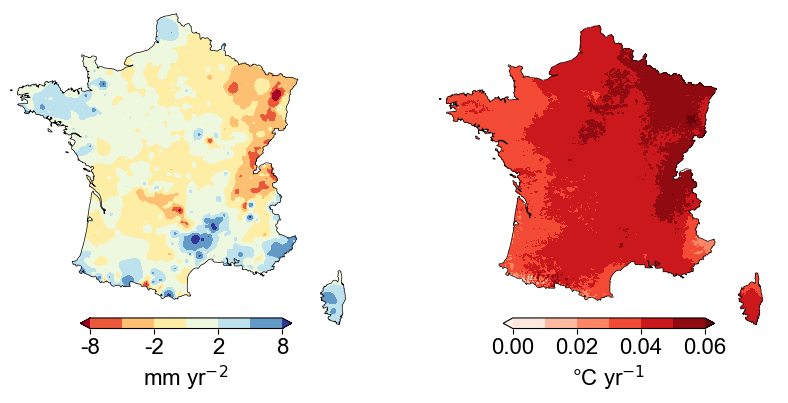

In [55]:
# Note: Cell takes up to xxx minutes to run
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
climate_evolution_plot(
    ax=ax[0], dataset="prec", season="13", first_year=1980, final_file=True
)
climate_evolution_plot(
    ax=ax[1], dataset="tmoy", season="13", first_year=1980, final_file=True
)
plt.show()

## Figure 1


Loading: ../../data/final/mortality_trends/df_map_trend-region_gre-species_top9-calculation_by_species.feather
Returning locally saved file!
Returning locally saved file!
Returning locally saved file!
Returning locally saved file!
Returning locally saved file!


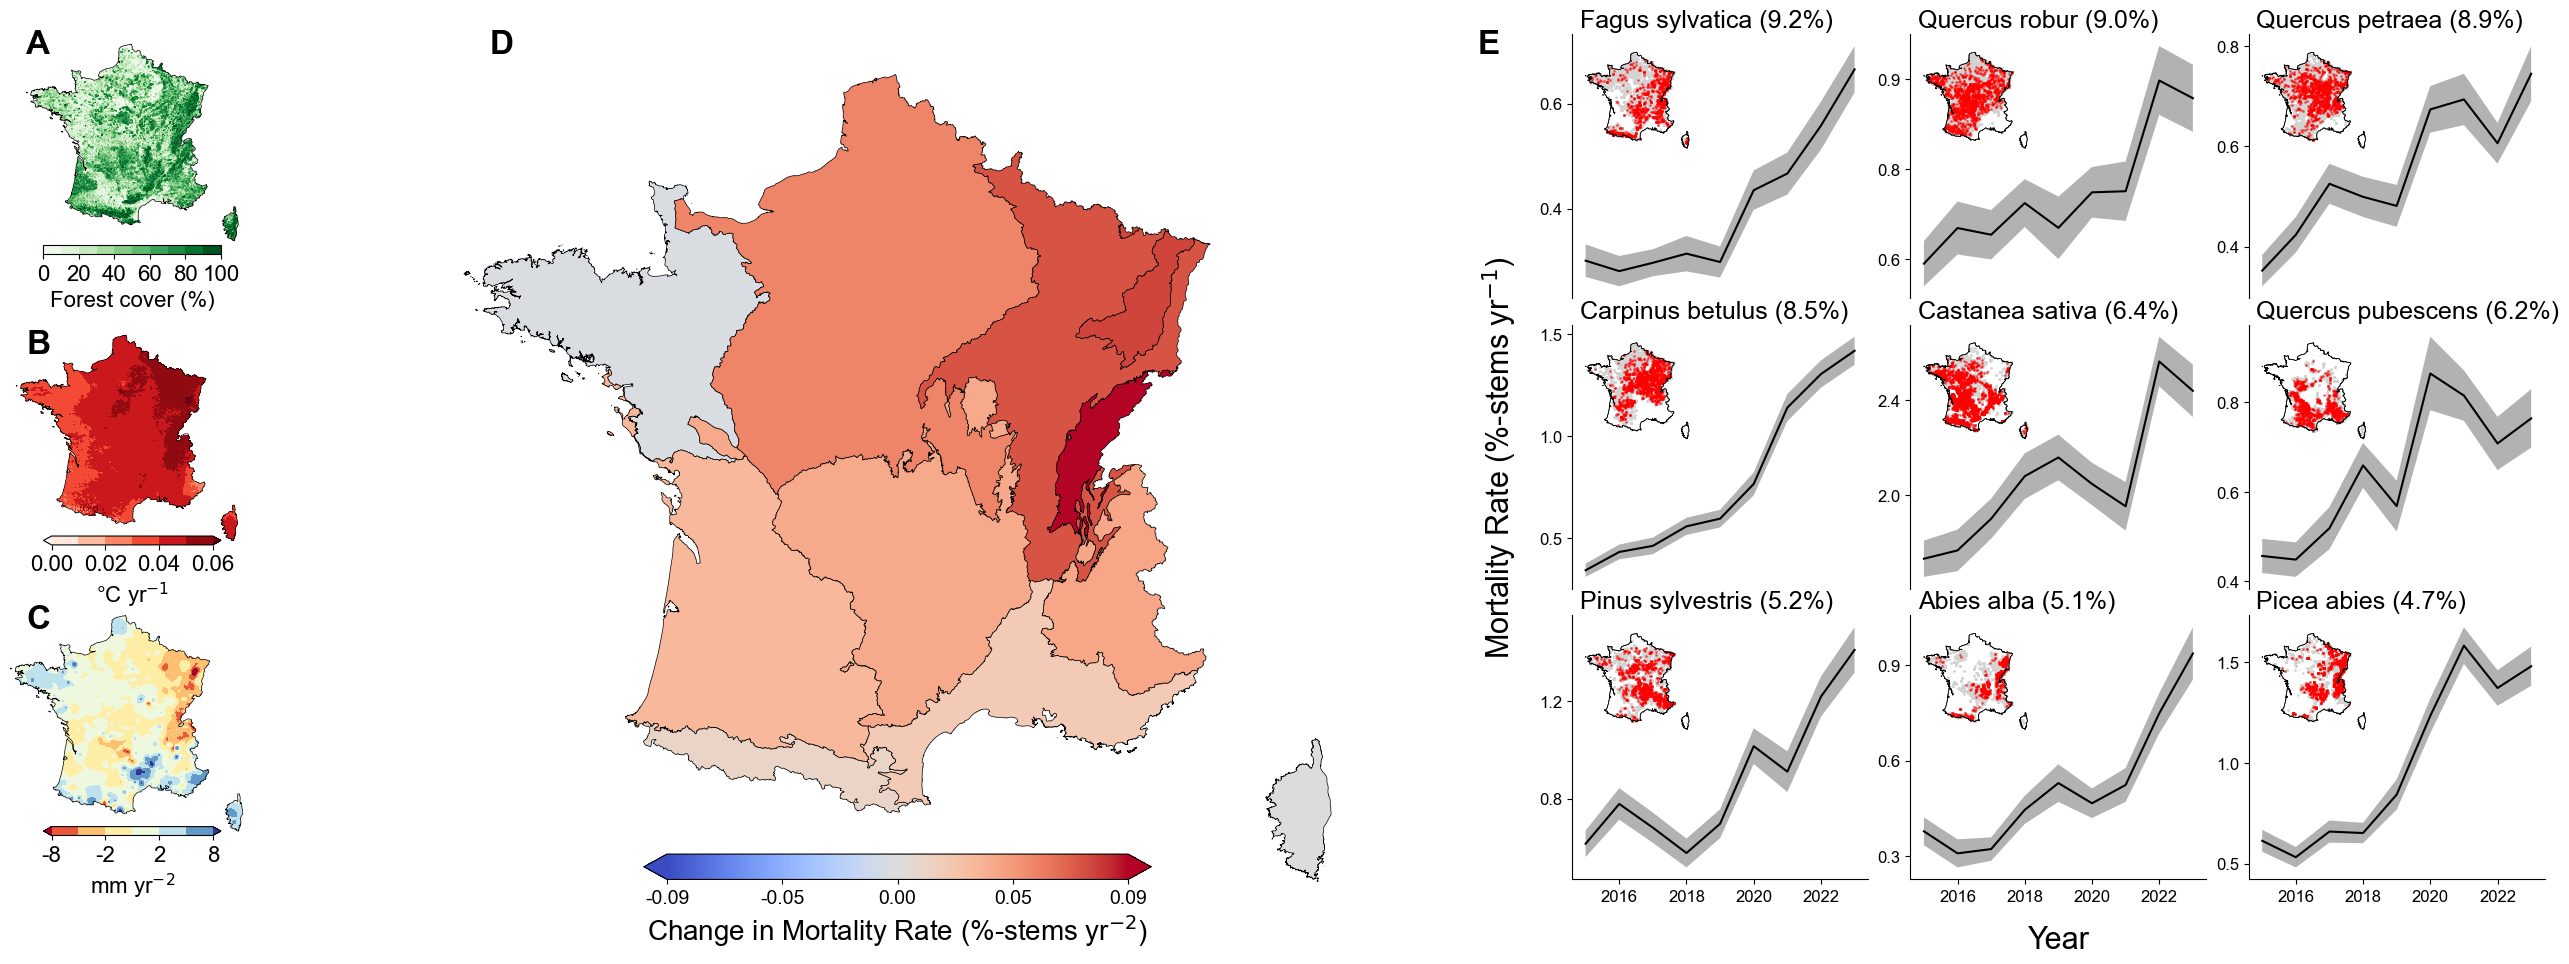

In [59]:
#
# ! Load map data
filename_df_map = "../../data/final/mortality_trends/df_map_trend-region_gre-species_top9-calculation_by_species.feather"
print(f"Loading: {filename_df_map}")
df_map = (
    pd.read_feather(filename_df_map)
    .drop(columns=["gre_num", "gre_name", "geometry"])
    .rename(columns={kwargs["my_grouping"][0]: "region"})
)

# Attach geometry
shp_region = get_shp_of_region(
    kwargs["my_grouping"][0], make_per_year=None, make_per_group=None
).rename(columns={kwargs["my_grouping"][0]: "region"})
df_map = shp_region.merge(df_map, on="region")

# ! Run the figure
# first_years = [1960, 1980, 2000]
first_years = [1980]

for first_year in first_years:
    # Create a figure and a grid layout
    fig = plt.figure(
        figsize=(26, 10)
    )  # Increase width to make space for the new column
    gs = gridspec.GridSpec(
        3,
        8,  # 9,
        figure=fig,
        height_ratios=[1, 1, 1],  # Equal height for rows
        width_ratios=[
            1,
            # 0.001,
            1.2,
            1.2,
            1.2,
            0.05,
            1,
            1,
            1,
        ],
    )

    # Get the left column axes
    ax_left1 = fig.add_subplot(gs[0, 0])  # First column, first row
    ax_left2 = fig.add_subplot(gs[1, 0])  # First column, second row
    ax_left3 = fig.add_subplot(gs[2, 0])  # First column, third row

    # Get the 3x3 grid for the map
    ax_map = fig.add_subplot(gs[:, 1:4])

    # Get the 3x3 grid for trend plots
    ax_1 = fig.add_subplot(gs[0, 5])
    ax_2 = fig.add_subplot(gs[0, 6])
    ax_3 = fig.add_subplot(gs[0, 7])
    ax_4 = fig.add_subplot(gs[1, 5])
    ax_5 = fig.add_subplot(gs[1, 6])
    ax_6 = fig.add_subplot(gs[1, 7])
    ax_7 = fig.add_subplot(gs[2, 5])
    ax_8 = fig.add_subplot(gs[2, 6])
    ax_9 = fig.add_subplot(gs[2, 7])

    # Define the axes that will have x and y axis labels
    ax_central_y = ax_4  # Middle plot for y-axis
    ax_central_x = ax_8  # Middle plot for x-axis

    # ! Add plots (outcomment for quick edits) -----------------------
    # ! Left Column
    # Forest Cover
    ax_left1 = forest_cover_plot(ax_left1, final_file=True)
    # Temperature Change
    ax_left2 = climate_evolution_plot(
        ax_left2, "tmoy", season="13", first_year=first_year, final_file=True
    )
    # Precipitation Change
    ax_left3 = climate_evolution_plot(
        ax_left3, "prec", season="13", first_year=first_year, final_file=True
    )

    # ! Mortality Map
    ax_map = make_map(df_map, ax=ax_map, ts_legend=20, ts_ticks=14)

    # ! Trends
    for i, ax in enumerate(
        [ax_1, ax_2, ax_3, ax_4, ax_5, ax_6, ax_7, ax_8, ax_9], start=1
    ):
        plot_trend_with_inset(
            top9_species["species"].iloc[i - 1],
            df_top9,
            nfi_raw,
            mytitle=top9_species["title"].iloc[i - 1],
            jitter_amount=1000,
            dot_size=1,
            ax=ax,
            font_scaler_graph=1,
        )

        # Remove y-axis labels for all except the middle left (ax_central_y)
        if ax != ax_central_y:
            ax.set_ylabel("")

        # Remove x-axis labels for all except the middle bottom (ax_central_x)
        if ax != ax_central_x:
            ax.set_xlabel("")

        # Remove ticks for all except bottom
        if i not in [7, 8, 9]:
            ax.set_xticklabels([])
            ax.set_xticks([])
            ax.spines["bottom"].set_visible(False)
    # Trends (loop end)

    # Increase the font size and move axis labels for the central axes
    ax_central_y.set_ylabel(
        "Mortality Rate (%-stems yr$^{-1}$)",
        # fontweight="bold",
        fontsize=22,
        labelpad=15,
    )
    ax_central_x.set_xlabel(
        "Year",
        # fontweight="bold",
        fontsize=22,
        labelpad=15,
    )

    # Optional: Additional adjustments to make the central labels more prominent
    ax_central_y.yaxis.set_label_position("left")
    ax_central_x.xaxis.set_label_position("bottom")

    # ! Add letters to the subplots
    add_text_to_plot()

    plt.savefig(
        f"overview-climate_change-mortality.png",
        dpi=300,
    )
    # plt.savefig(
    #     f"./specific_runs/fig_1/fig1-v4-complete-{first_year}_period-{what_species}_for_map.png",
    #     dpi=300,
    # )
    plt.show()
    plt.close()

chime.success()

## Figure S1


In [ ]:
# Settings
kwargs = {
    # ! General
    "file_suffix": None,
    # ! Metric
    "my_metric": "mort_nat_stems_prc_yr",  # "mort_nat_stems_prc_yr" mort_nat_vol_yr, mort_nat_vol_prc_yr
    # ! Data Wrangling
    "df": nfi_raw.copy(),
    # "my_grouping": ["gre", "species_lat"],
    "my_grouping": ["gre"],
    "my_method": "direct_bs",
    "load_from_file": True,
    "top_n_groups": None,
    "n_bootstraps_samples": 100,
    # ! Data Filter
    "min_trees_per_site": 0,
    "min_sites_per_group_year": 0,
    "reduce_to_dominant_sites": False,
    "weigh_by_sites_or_trees": "none",  # none, sites, trees
    # ! Plotting
    "plot_type": "facet",  # all or facet
    "save_plot": True,
    "center_to_first_year": False,
    "normalize_to_first_year": False,
    "ylim": None,  # [-200, 400],  # None or [min, max]
    "facet_label_trees_or_sites": "trees",  # trees or sites
    "uncertainty_representation": "band",  # band, bar, none
    "uncertainty_variable": "std",
    "aggregation_variable": "mean",
    "top_n_metric": "most_observations",  # most_observations or highest_final_mortality
    "top_n_groups_plot": 15,
    # "genus_filter": None,  # None or list of genus_lat values to filter for # ! Not implemented yet, needs a species-genus dictionary!
}


def custom_sort_key(element):
    priority_order = ["gre", "ser", "hex", "reg", "dep"]
    if element in priority_order:
        return (priority_order.index(element), element)
    else:
        return (len(priority_order), element)

In [ ]:
# # ! Settings
species52 = get_species_with_models("list")
# | Get all species of final analysis
iregion = "gre"
# | gre, ser, hex, reg, dep | Region to plot
what_species = "final_analysis"
# | top9, all, final_analysis | Relevant whether map trend is based on all or top9 species
by_species_or_direct = "by_species"
# | by_species or directly | Relevant whether map trend is averaged over species or calculated directly
# fig1_folder = "./specific_runs/fig_si-52_species_temporal/data"
fig1_folder = "../../data/final/mortality_trends/"
# | Folder to save the data for the figure
os.makedirs(fig1_folder, exist_ok=True)

In [ ]:
file_temp = f"{fig1_folder}/df_species52_temporal_data.feather"

if os.path.exists(file_temp):
    df_species52 = pd.read_feather(file_temp)
    print(f"Loaded data from file: {file_temp}")
    chime.info()
else:
    # Only need the species52 species for the facet grid
    kwargs["suffix"] = (
        f"temporal_trend-region_{iregion}-species_{what_species}-calculation_{by_species_or_direct}"
    )
    kwargs["df"] = nfi_raw.copy().query("species_lat2 in @species52")
    kwargs["my_grouping"] = ["species_lat2"]
    kwargs["load_from_file"] = False

    print(kwargs["suffix"])

    # Run function
    kwargs["my_grouping"] = sorted(kwargs["my_grouping"], key=custom_sort_key)
    df_counts, df_gm, df_grouped = start_to_finish_temporal_plot(
        kwargs,
        return_before_plotting=True,
    )
    chime.success()

    df_species52_raw = df_grouped.copy()

    # ! Wrangling
    # Get copy of df_grouped
    df_species52 = df_species52_raw.copy()

    # Extract group and year
    df_species52["group"] = df_species52["group_year"].str.split("_", expand=True)[0]
    df_species52["year"] = (
        df_species52["group_year"].str.split("_", expand=True)[1].astype(int)
    )

    # Extract mean value
    df_species52["mean"] = df_species52[f"{kwargs['my_metric']}_mean"]
    df_species52["std"] = df_species52[f"{kwargs['my_metric']}_std"]

    # Reduce df size
    df_species52 = df_species52[["group", "year", "group_year", "mean", "std"]].copy()
    df_species52["region"] = df_species52["group"].str.split("&", expand=True)[0]

    # Save it
    df_species52.to_feather(f"{fig1_folder}/df_species52_temporal_data.feather")

df_species52.head(20)

Loaded data from file: ../../data/final/mortality_trends//df_species52_temporal_data.feather


,group,year,group_year,mean,std,region
0,Abies alba,2010,Abies alba_2010,0.367618,0.043730,Abies alba
1,Abies alba,2011,Abies alba_2011,0.307610,0.041364,Abies alba
2,Abies alba,2012,Abies alba_2012,0.327228,0.045488,Abies alba
3,Abies alba,2013,Abies alba_2013,0.449303,0.053001,Abies alba
4,Abies alba,2014,Abies alba_2014,0.544722,0.057919,Abies alba
5,Abies alba,2015,Abies alba_2015,0.457051,0.048579,Abies alba
6,Abies alba,2016,Abies alba_2016,0.523932,0.067519,Abies alba
7,Abies alba,2017,Abies alba_2017,0.749755,0.060393,Abies alba
8,Abies alba,2018,Abies alba_2018,0.925870,0.067774,Abies alba
9,Abies grandis,2010,Abies grandis_2010,1.346479,0.635049,Abies grandis


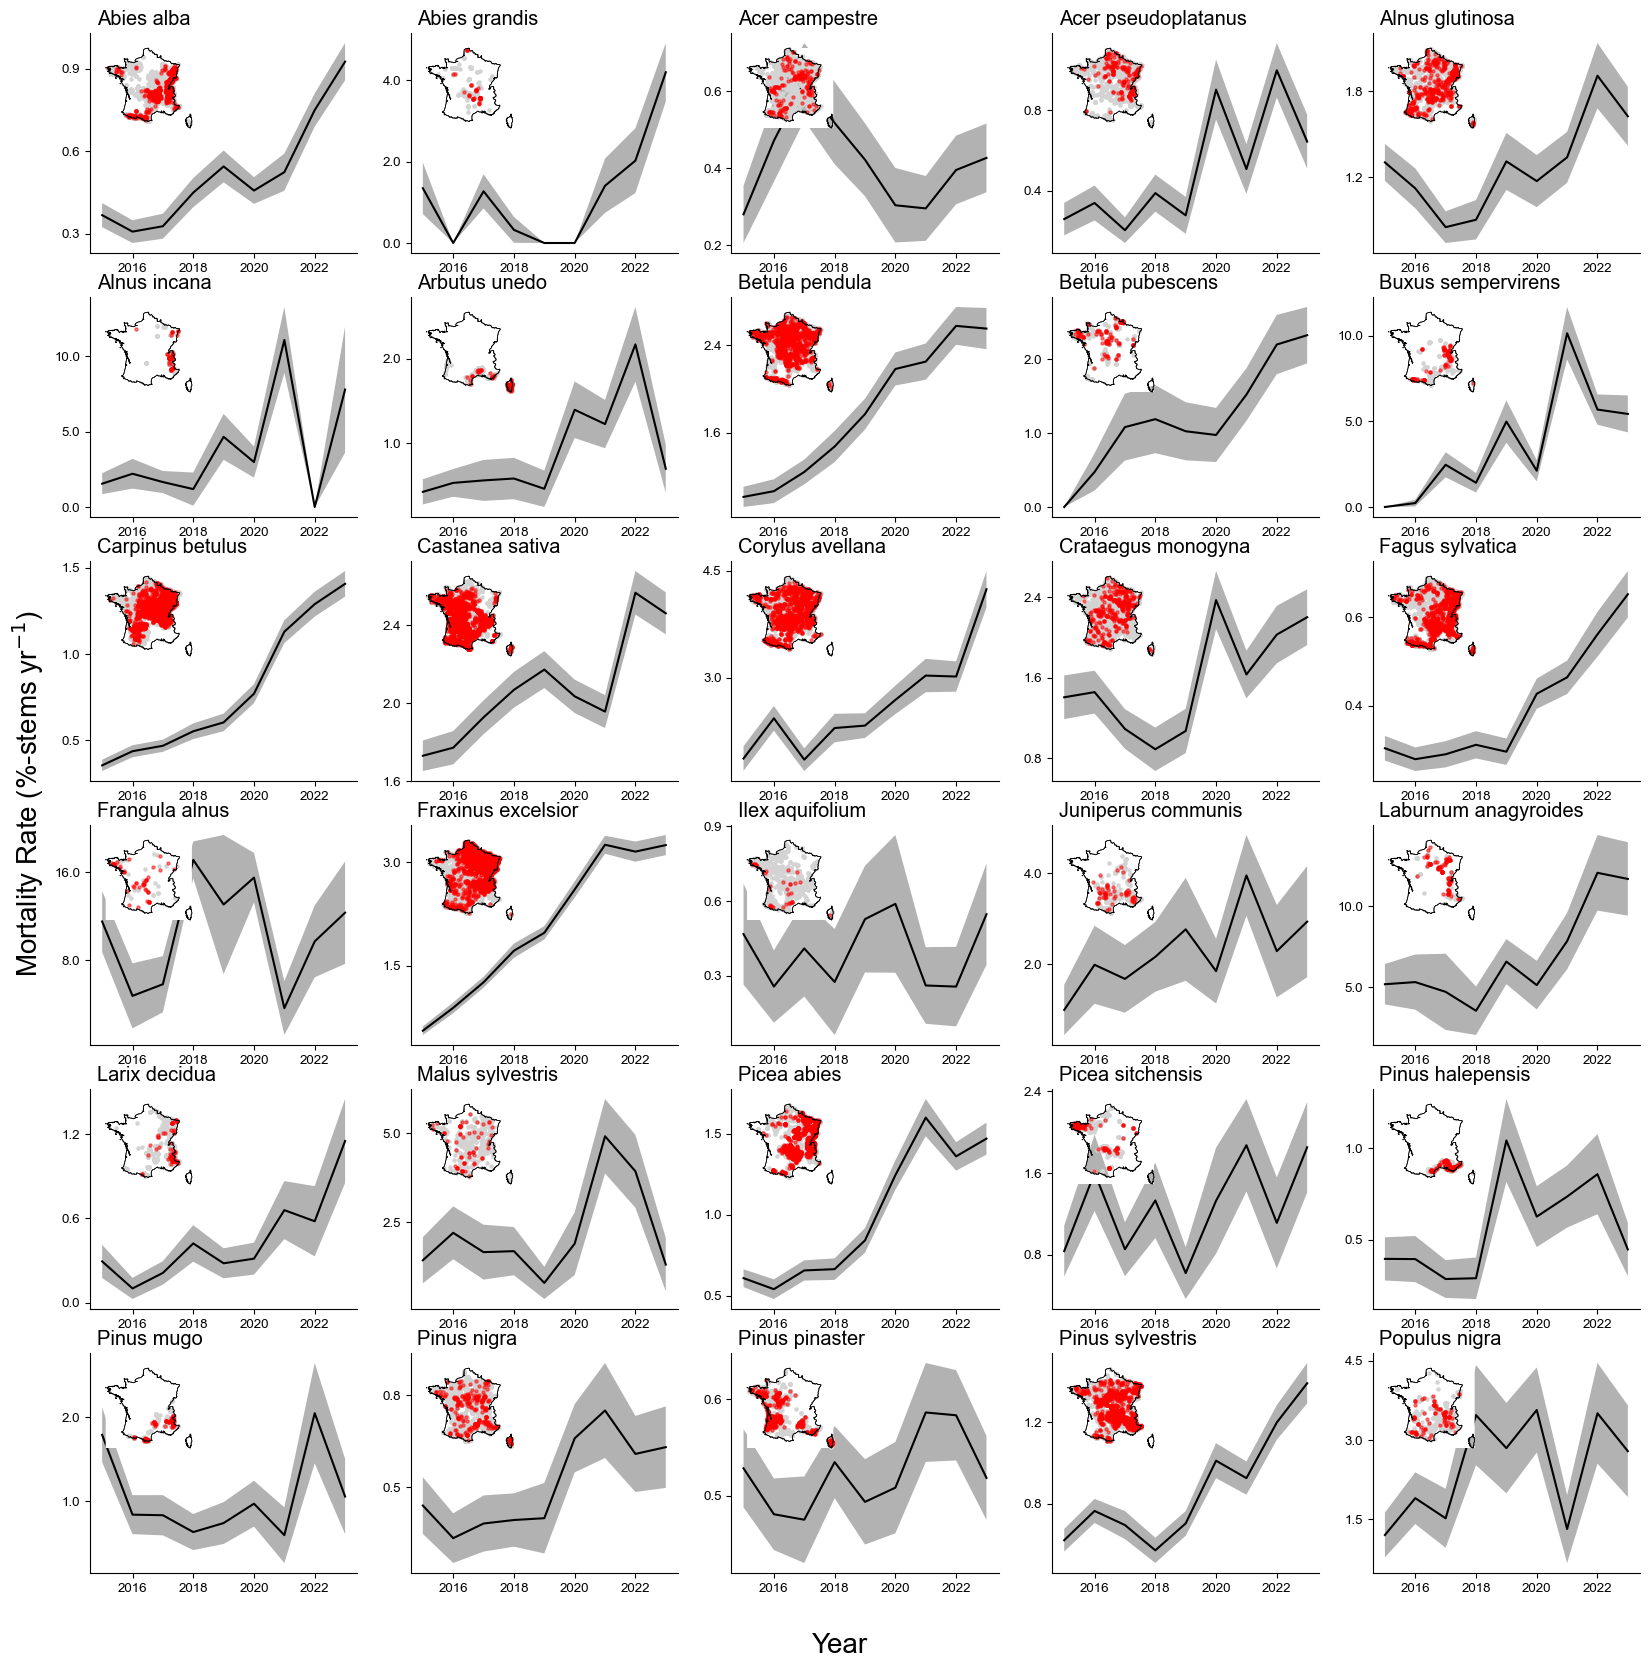

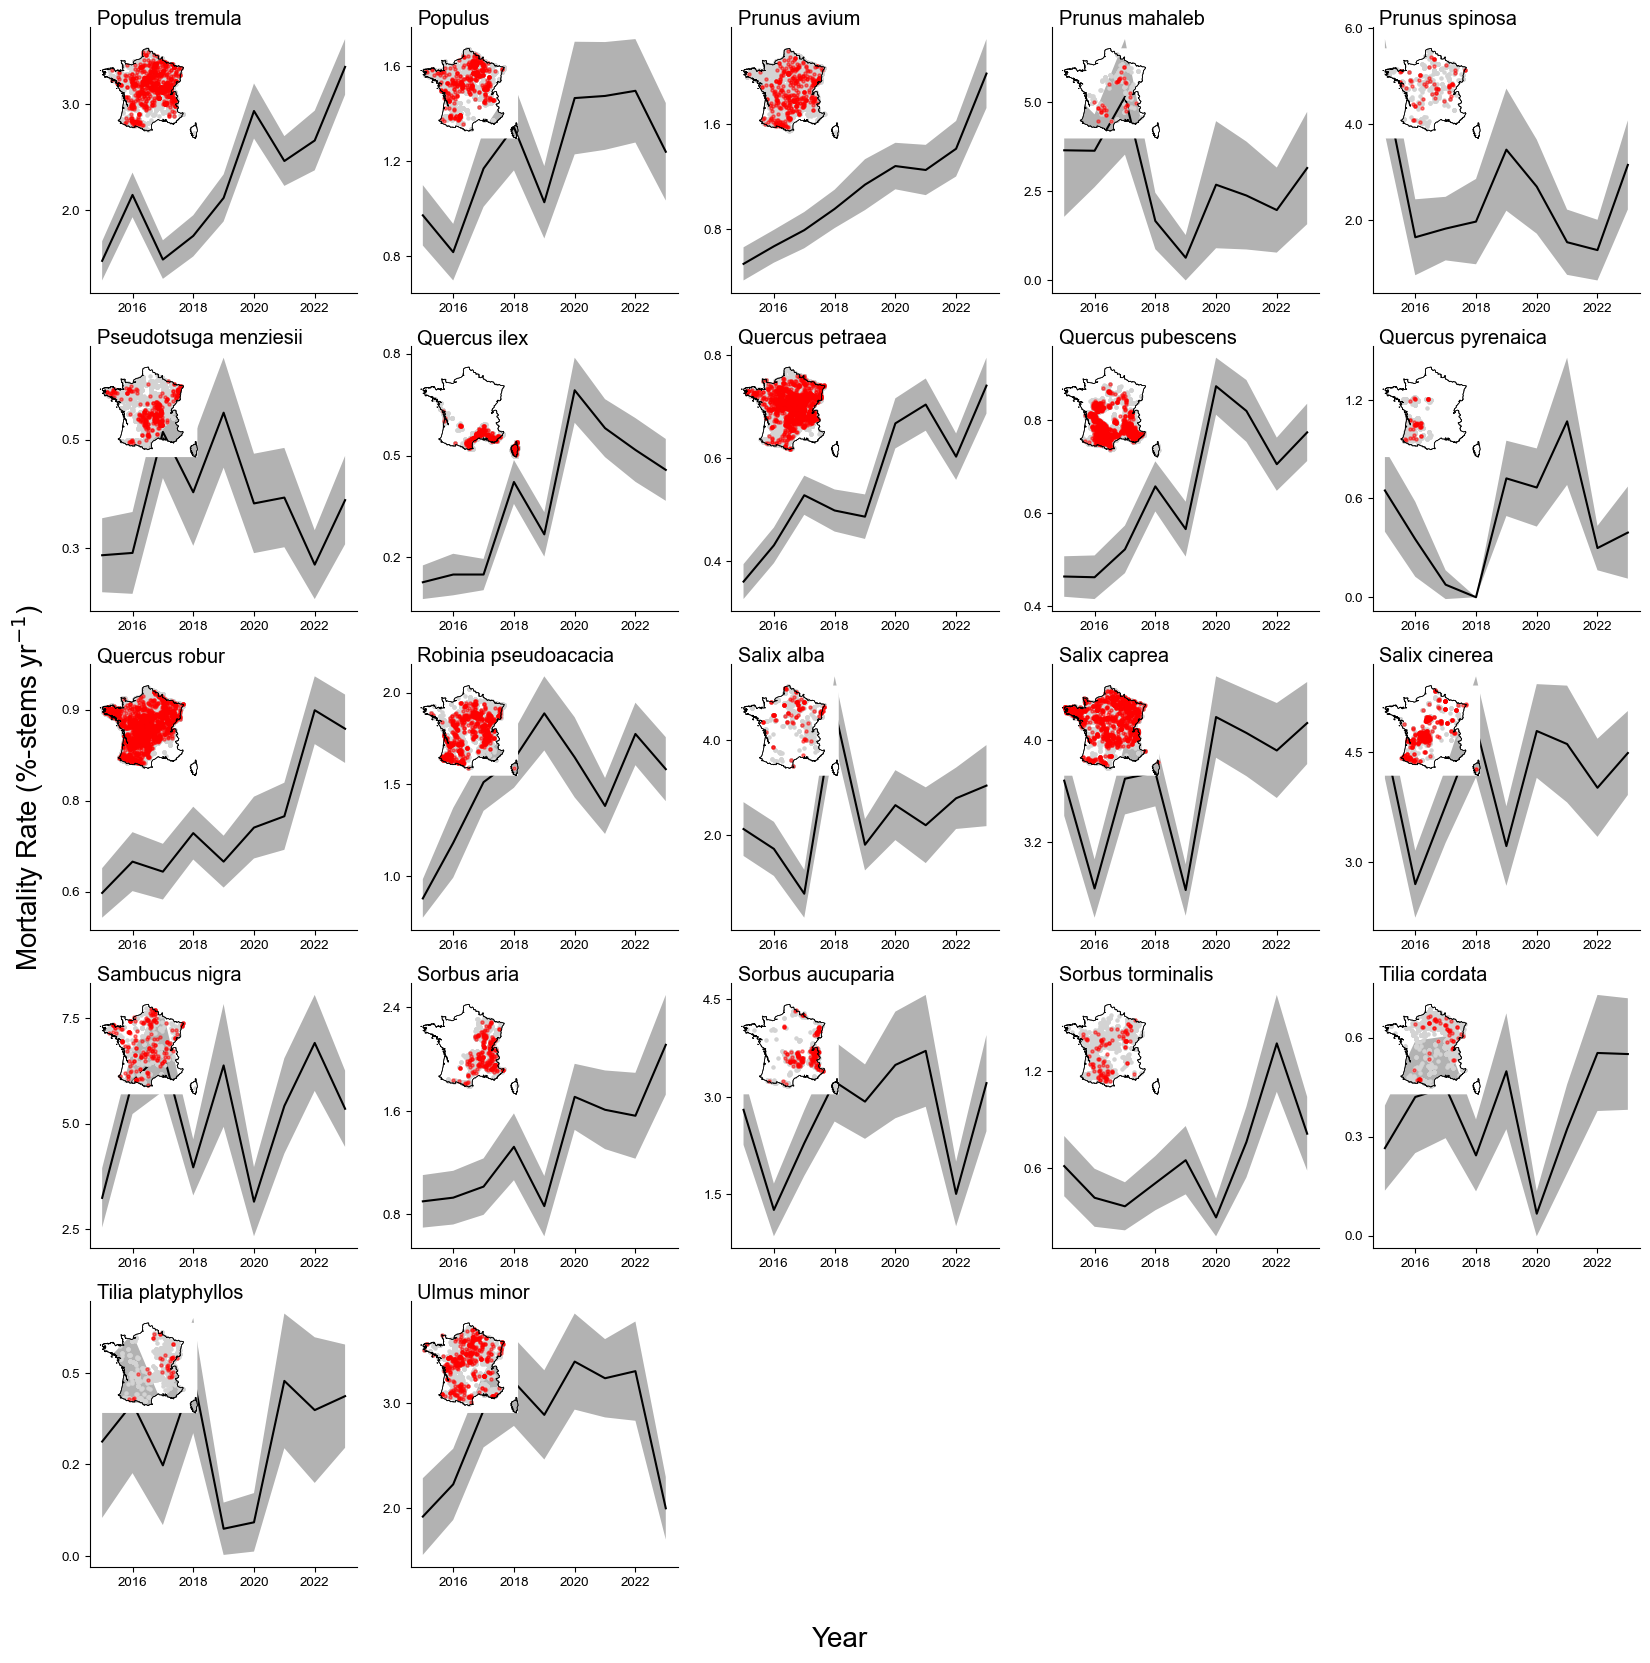

In [ ]:
# Note: Cell takes up to 5 minutes to run


# ! Separate species for two plots
part1 = df_species52.group.unique()[:30]
part2 = df_species52.group.unique()[30:]

# ! First Part  -----------------------------------
# Make a grid of 4x6 plots
fig, axs = plt.subplots(6, 5, figsize=(20, 20))

# Flatten the axs array
axs = axs.flatten()

# Loop over each species and plot the trend with inset
for i, species in enumerate(part1):
    plot_trend_with_inset(
        species,
        df_species52,
        nfi_raw,
        ax=axs[i],
        font_scaler_graph=0.8,
        font_scaler_inset=0.5,
    )
    # Remove x-axis labels
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")

# Add universal y-axis label
fig.text(
    0.085,
    0.5,
    "Mortality Rate (%-stems yr$^{-1}$)",
    va="center",
    rotation="vertical",
    fontsize=20,
)
# Add universal x-axis label
fig.text(
    0.5,
    0.07,
    "Year",
    ha="center",
    fontsize=20,
)

# Save the plot
# plt.savefig(f"{fig1_folder}/fig-52_species_temporal_trend-1.png")
plt.savefig(f"./mortality_trends-all_species-1.png")
plt.show()

# ! Second Part  -----------------------------------
# Make a grid of 4x6 plots
fig, axs = plt.subplots(5, 5, figsize=(20, 20))

# Flatten the axs array
axs = axs.flatten()

# Loop over each species and plot the trend with inset
for i, species in enumerate(part2):
    plot_trend_with_inset(
        species,
        df_species52,
        nfi_raw,
        ax=axs[i],
        font_scaler_graph=0.8,
        font_scaler_inset=0.5,
    )
    # Remove x-axis labels
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")

# Remove empty subplots
for i in range(len(part2), len(axs)):
    axs[i].axis("off")

# Add universal y-axis label
fig.text(
    0.085,
    0.5,
    "Mortality Rate (%-stems yr$^{-1}$)",
    va="center",
    rotation="vertical",
    fontsize=20,
)
# Add universal x-axis label
fig.text(
    0.5,
    0.07,
    "Year",
    ha="center",
    fontsize=20,
)

# Save the plot
# plt.savefig(f"{fig1_folder}/fig-52_species_temporal_trend-2.png")
plt.savefig(f"./mortality_trends-all_species-2.png")
plt.show()

## Figure S2


Loading: ../../data/final/mortality_trends/df_map_trend-region_gre-species_all-calculation_by_species.feather
Saved map to mortality_map-all_species.png


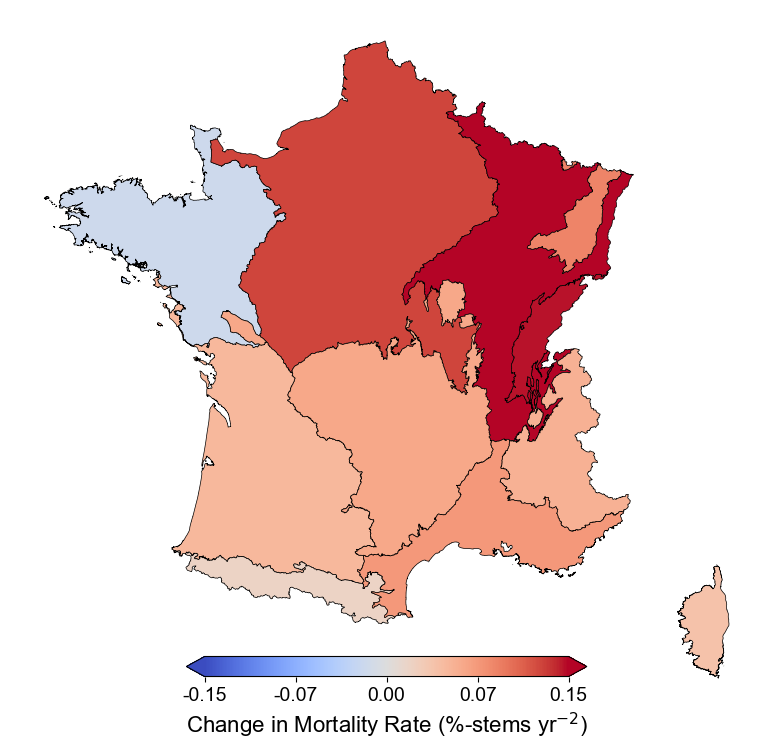

In [ ]:
# Load and show the data
filename_df_map = "../../data/final/mortality_trends/df_map_trend-region_gre-species_all-calculation_by_species.feather"
print(f"Loading: {filename_df_map}")
df_map = (
    pd.read_feather(filename_df_map)
    .drop(columns=["gre_num", "gre_name", "geometry"])
    .rename(columns={kwargs["my_grouping"][0]: "region"})
)

# ! Turn into gdf
# Attach geometry
shp_region = get_shp_of_region(
    kwargs["my_grouping"][0], make_per_year=None, make_per_group=None
).rename(columns={kwargs["my_grouping"][0]: "region"})
df_map = shp_region.merge(df_map, on="region")

make_map(df_map, filepath="mortality_map-all_species.png", ts_legend=16, ts_ticks=14)